<a href="https://colab.research.google.com/github/flash-berry/Data-Science-/blob/main/%D0%94%D0%972%D0%BF%D0%BEDS_%D0%98%D0%96%D0%A6%D0%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашняя работа №2**

Выполнил Пышный Артём Александрович

Доступ к датасету: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Текущий датасет содержит исчерпывающие знания о 2392 студентах для создания модели, способной предсказывать средний балл студента (GradeClass или GPA) по следующим признакам:**

StudentID : Уникальный идентификатор, присваиваемый каждому студенту (от 1001 до 3392).

Age: Возраст учащихся составляет от 15 до 18 лет.

Gender:  Пол учащихся, где 0 представляет мужской пол, а 1 представляет женский пол.

Ethnicity: этническая принадлежность студентов кодируется следующим образом:

  0: Кавказец

  1: Афроамериканец

  2: Азиатка

  3: Другое

ParentalEducation: уровень образования родителей, кодируется следующим образом:

0: Нет

1: Средняя школа

2: Немного колледжа

3: Бакалавр

4: Высшее

StudyTimeWeekly: еженедельное время обучения в часах, от 0 до 20.

Absence: количество пропусков в течение учебного года, от 0 до 30.

Tutoring: статус репетиторства, где 0 означает «Нет», а 1 означает «Да».

ParentalSupport: уровень родительской поддержки, кодируется следующим образом:

0: Нет

1: Низкий

2: Умеренный

3: Высокий

4: Очень высокий

Extracurricular: участие во внеклассных мероприятиях, где 0 означает «Нет», а 1 означает «Да».

Sports: Участие в спортивных состязаниях, где 0 означает «Нет», а 1 означает «Да».

Music: Участие в музыкальных мероприятиях, где 0 означает «Нет», а 1 означает «Да».

Volunteering: участие в волонтерской деятельности, где 0 означает «Нет», а 1 означает «Да».

GPA: средний балл по шкале от 0 до 4,0, на который влияют привычки в учебе, участие родителей и внеклассные мероприятия.

GradeClass: Классификация оценок студентов на основе среднего балла:

0: «отлично» (средний балл >= 3,5)

1: «B» (3,0 <= средний балл < 3,5)

2: «С» (2,5 <= средний балл < 3,0)

3: «D» (2,0 <= средний балл < 2,5)

4: «F» (средний балл < 2,0)

In [ ]:
df = pd.read_csv('/content/Student_performance_data _.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Столбец StudentID - это индекс студентов, который дублирует номер строк, поэтому его можно удалить

In [ ]:
df.drop(['StudentID'], axis=1, inplace=True)
df['GradeClass'].value_counts()

,count
GradeClass,
4.0,1211
3.0,414
2.0,391
1.0,269
0.0,107


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0
Sports,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 261.8 KB


In [ ]:
df.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


# 1) Постройте гистограммы частот непрерывных признаков и столбиковые диаграммы качественных признаков, проанализируйте наличие выбросов.

Создадим бинарный признак успеваемости:

0 - успеваемость плохая ( GradeClass = [2, 3, 4] )

1 - успеваемость хорошая ( GradeClass = [0, 1] )

In [ ]:
df['Binary_student_assessment'] = np.nan  # заполняем сначала значения нового признака нулями
df.loc[df['GradeClass'] <= 1,'Binary_student_assessment'] = 1
df.loc[df['GradeClass'] > 1,'Binary_student_assessment'] = 0
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Binary_student_assessment
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,0.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,0.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,0.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,0.0


In [ ]:
df['Binary_student_assessment'].value_counts()

,count
Binary_student_assessment,
0.0,2016
1.0,376


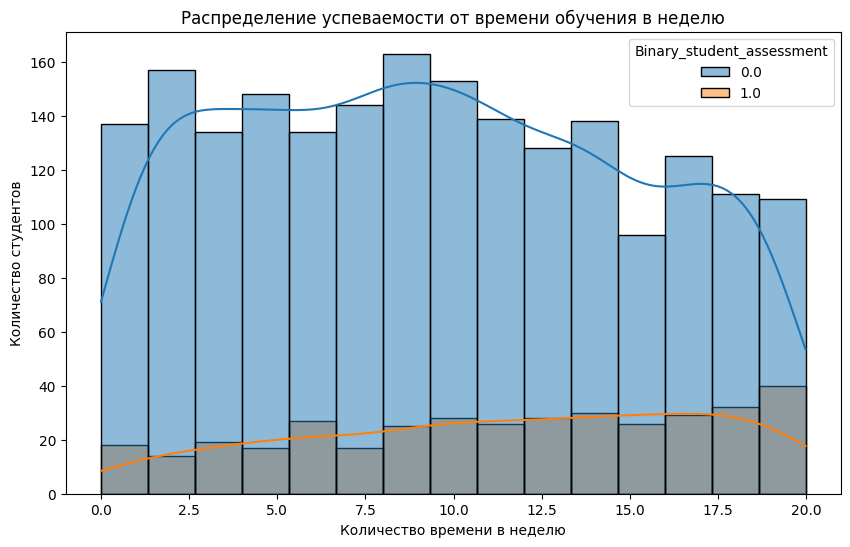

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data = df, x="StudyTimeWeekly", kde=True, hue="Binary_student_assessment")
plt.title('Распределение успеваемости от времени обучения в неделю')
plt.xlabel('Количество времени в неделю')
plt.ylabel('Количество студентов')
plt.show()

По графику аномалий не наблюдается и можно сделать следующий вывод: чем больше студент тратит времени на обучение в неделю, тем лучше его успеваемость

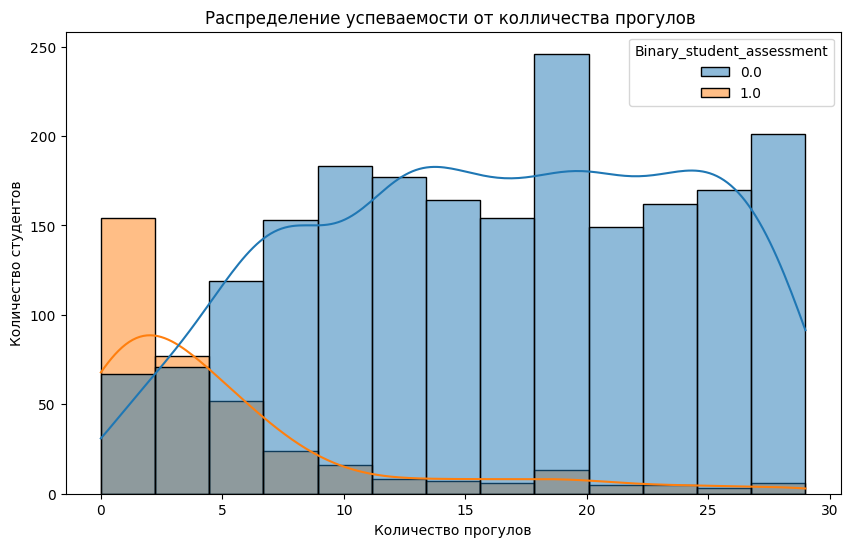

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data = df, x="Absences", kde=True, hue="Binary_student_assessment")
plt.title('Распределение успеваемости от колличества прогулов ')
plt.xlabel('Количество прогулов')
plt.ylabel('Количество студентов')
plt.show()

На графиках видны хвосты:

1) Для студентов с хорошей успеваемость наблюдается правый длинный и тяжёлый хвост, к которому относятся студенты, которые прогуливают много, но всё равно имеют хороший средний балл и успеваемость.

2) Для студентов с плохой успеваемостью, наблюдается незначительный перекос влево, который содержит студентов с высокой посещаемостью, но низкой успеваемостью.

Больше всего студентов с хорошей успеваемостью прогуливали меньше 5 раз, самое большое количество студентов с плохой успеваемостью прогуливали в среднем 20 раз.

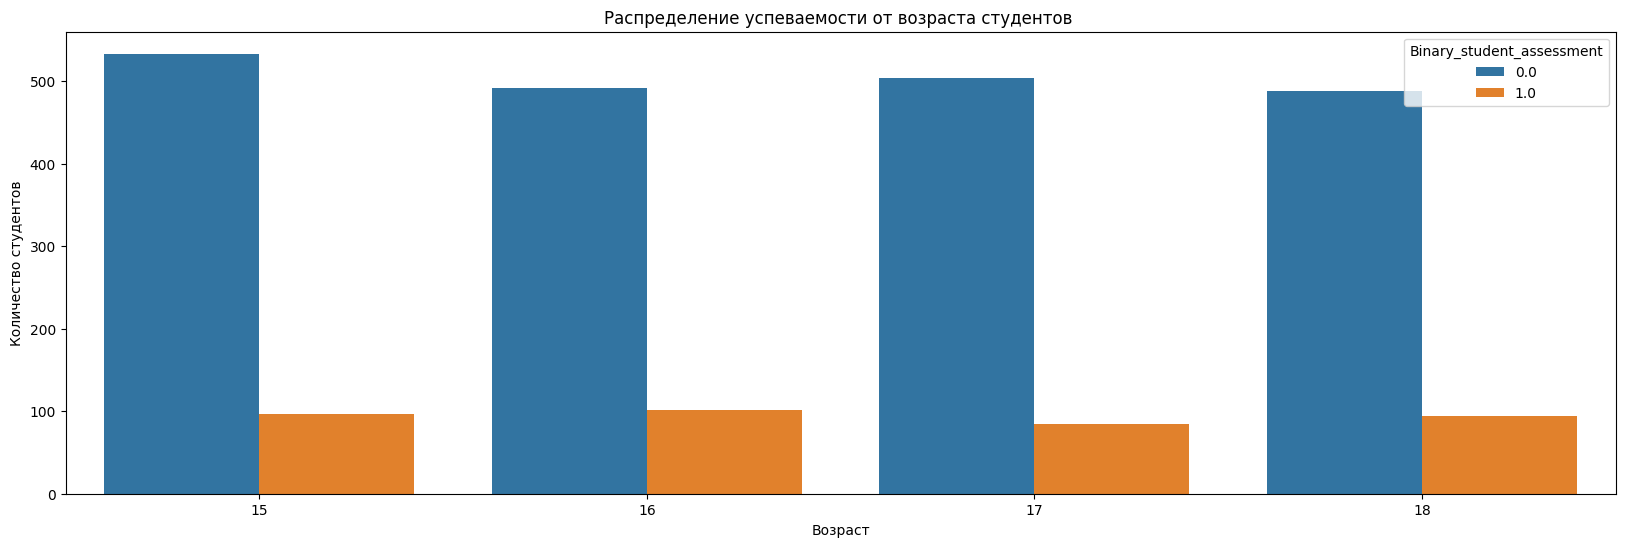

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Age',  hue="Binary_student_assessment")
plt.title('Распределение успеваемости от возраста студентов ')
plt.xlabel('Возраст')
plt.ylabel('Количество студентов')
plt.show()

В наборе данных возрастные группы разделены поровну, лишь с маленьким перевесом для группы 15 лет

Успеваемость по возрастным группам пропорциональна

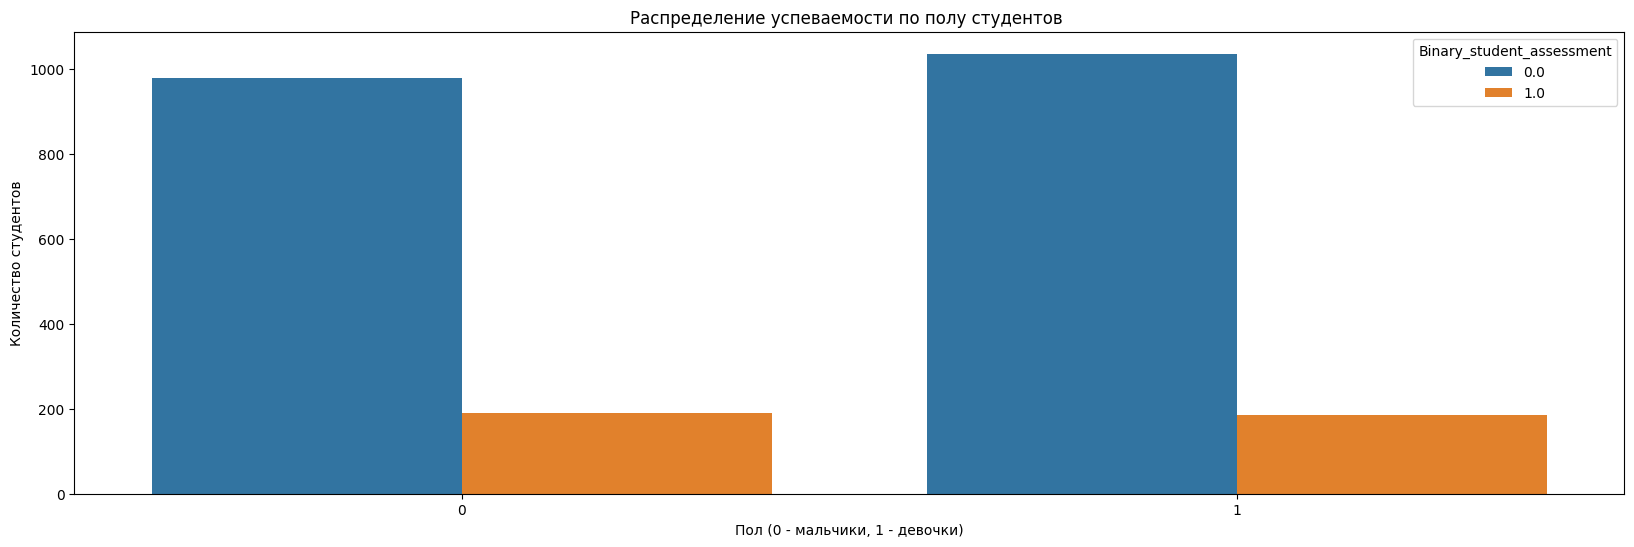

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Gender',  hue="Binary_student_assessment")
plt.title('Распределение успеваемости по полу студентов ')
plt.xlabel('Пол (0 - мальчики, 1 - девочки)')
plt.ylabel('Количество студентов')
plt.show()

В наборе данных гендерные группы разделены поровну, лишь с маленьким перевесом в сторону девочек

Успеваемость по гендерным группам пропорциональна

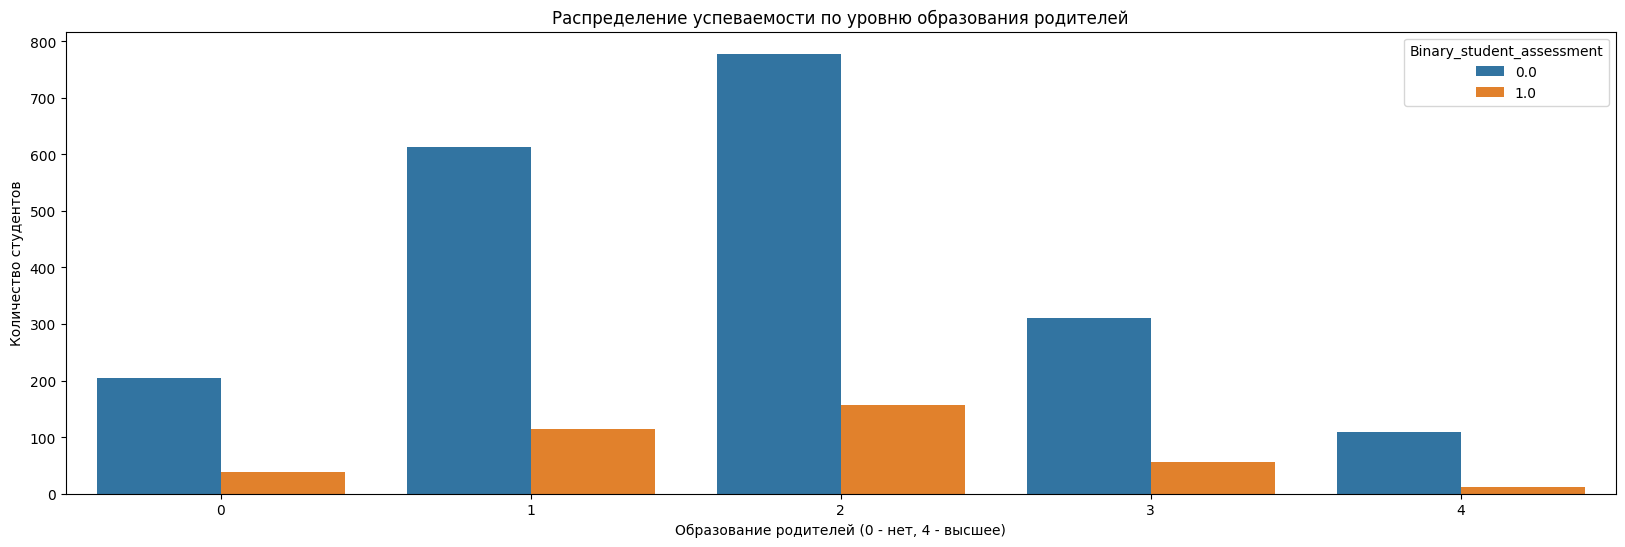

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='ParentalEducation',  hue="Binary_student_assessment")
plt.title('Распределение успеваемости по уровню образования родителей')
plt.xlabel('Образование родителей (0 - нет, 4 - высшее)')
plt.ylabel('Количество студентов')
plt.show()

На графике аномалий не наблюдается, кроме случая, когда родители имеют высшее образование

Для наглядности построим график пропорционального распределения

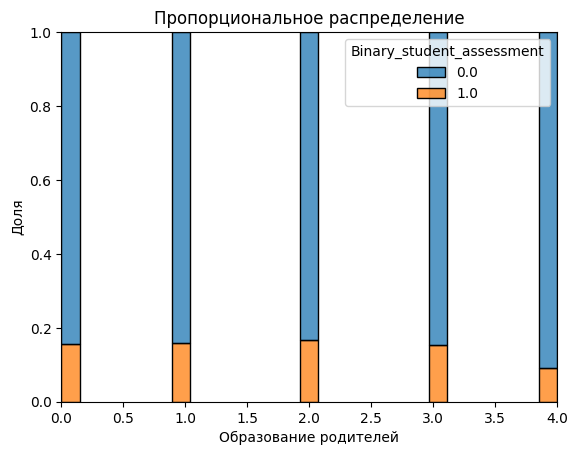

In [ ]:
sns.histplot(
    data=df,
    x="ParentalEducation",
    hue="Binary_student_assessment",
    multiple="fill",
    stat="proportion",
)
plt.title("Пропорциональное распределение")
plt.ylabel("Доля")
plt.xlabel("Образование родителей")
plt.show()

Распределение пропорций в групах образования 0 - 3 близко к одинаковому, а в 4 группе оно заметно ниже, что может говорить об аномальности: это могут быть как ошибки в данных, так и редкие случаи, которые требуется дополнительно проанализировать. Например, обусловена ли эта разница случайным фактором (маленькая или не точная выборка) или нет.

# 2) Используйте любой подход машинного обучения для определения аномалий в датасете.

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
features = ['GPA', 'Absences']
data = df[features]

data = data.dropna()

In [ ]:
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(data)

data['anomaly'] = model.predict(data)

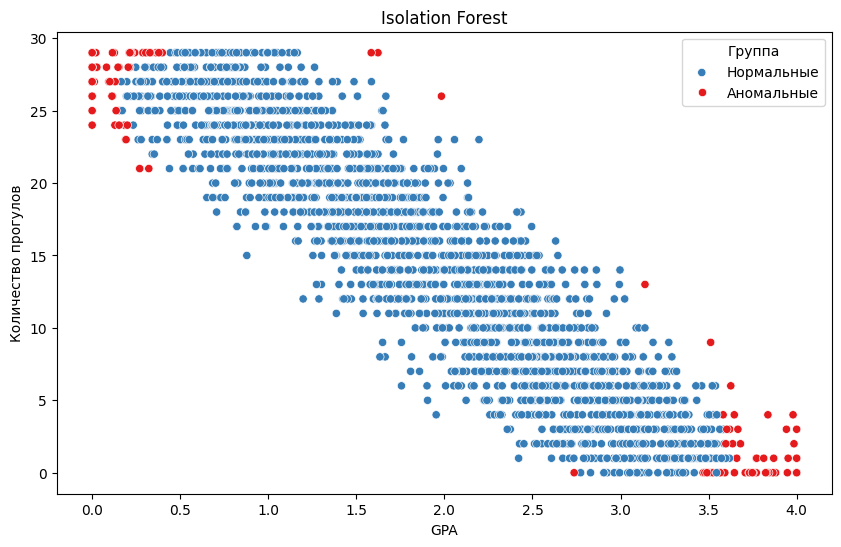

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GPA', y='Absences', hue='anomaly', data=data, palette='Set1')
plt.title('Isolation Forest')
plt.xlabel('GPA')
plt.ylabel('Количество прогулов')
plt.legend(title='Группа', labels=['Нормальные', 'Аномальные'])
plt.show()

In [ ]:
data[data['anomaly'] == -1]

,GPA,Absences,anomaly
2,0.112602,26,-1
9,3.573474,0,-1
22,0.312546,29,-1
44,4.000000,1,-1
57,0.286571,29,-1
...,...,...,...
2281,0.214570,29,-1
2295,3.597766,2,-1
2310,0.000000,28,-1
2319,4.000000,0,-1


Алгоритм IsolationForest обнаружил 120 аномалий в наборе данных. Аномалии на графике помечены красными точками, и они относятся к студентам, которые имеют высокий балл успеваемости при высокой частоте прогулов и низкий балл успеваемости при низкой частоте прогулов. Аномалии требуют дополнительной проверки, чтобы в случае недостовернности исключить их из набора данных или наоборот дополнительно изучить, как редкие случаи.

# 3) Сравните выраженность непрерывных признаков между группами (какие есть в Вашем датасете) при помощи подходящего статистического критерия (достаточно 2-3 гипотезы с проверкой и интерпретацией).

In [ ]:
from scipy.stats import ttest_ind, chi2_contingency, shapiro, levene, mannwhitneyu

H0 - средняя частота прогулов для студентов с хорошей и плохой успеваемостью не различаются

H1 - различия значимые

In [ ]:
group_0 = df[df['Binary_student_assessment'] == 0]['Absences']
group_1 = df[df['Binary_student_assessment'] == 1]['Absences']

In [ ]:
_, p_0 = shapiro(group_0)
_, p_1 = shapiro(group_1)
print(f"p-value (Группа A): {p_0:.3f}")  # > 0.05 → нормальное
print(f"p-value (Группа B): {p_1:.3f}")  # > 0.05 → нормальное

p-value (Группа A): 0.000
p-value (Группа B): 0.000


По тесту Шапиро-Уилка у двух групп не нормальное распределение

In [ ]:
_, p_levene = levene(group_0, group_1)
print(f"p-value (Левене): {p_levene:.3f}")  # > 0.05 → дисперсии равны

p-value (Левене): 0.000


По тесту Левена дисперсии не равны

In [ ]:
stat, p = mannwhitneyu(group_0, group_1)
print(f"Манна-Уитни: p-value = {p:.3f}")

Манна-Уитни: p-value = 0.000


In [ ]:
avg_0 = group_0.mean()
avg_1 = group_1.mean()
print(f"Средняя группы group_0: {avg_0}")
print(f"Средняя группы group_1: {avg_1}")

Средняя группы group_0: 16.239583333333332
Средняя группы group_1: 5.4361702127659575


<ipython-input-182-84e23cfa181c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Binary_student_assessment'], y=df['Absences'], palette='Set1')


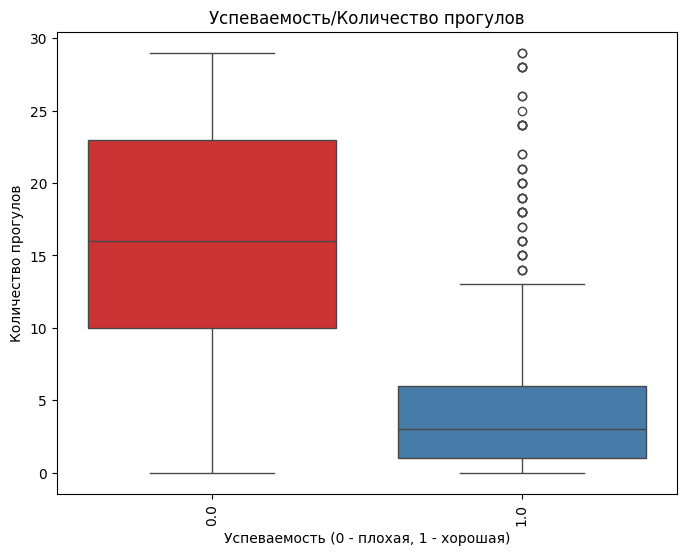

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Binary_student_assessment'], y=df['Absences'], palette='Set1')
plt.title('Успеваемость/Количество прогулов')
plt.xlabel('Успеваемость (0 - плохая, 1 - хорошая)')
plt.ylabel('Количество прогулов')
plt.xticks(rotation=90)
plt.show()

Данные в двух выборках не распределены нормально (тест Шапиро-Уилка) и дисперсии в них существенно различаются (тест Левена), поэтому для сравнения средних двух виборок был проведён непараметрический тест Манна-Уитни, который показал p-value < 0.05, что помогает отвергнуть нулевую гипотезу H0 и сделать вывод, что различия между двумя выборками значимы и частота прогулов для студентов с хорошей и плохой успеваемость различается.

На графике ящик с усами заметно, что среди студентов с хорошей успеваемостью есть выбросы (хорошая успеваемость, но много прогулов), так же усы у красного ящика растягиваются на весь вариационный ряд.

----------------------------
H0 - среднее количество часов обучения в неделю для студентов с хорошей и плохой успеваемостью не различаются

H1 - различия значимые

In [ ]:
group_0 = df[df['Binary_student_assessment'] == 0]['StudyTimeWeekly']
group_1 = df[df['Binary_student_assessment'] == 1]['StudyTimeWeekly']

In [ ]:
_, p_0 = shapiro(group_0)
_, p_1 = shapiro(group_1)
print(f"p-value (Группа A): {p_0:.3f}")  # > 0.05 → нормальное
print(f"p-value (Группа B): {p_1:.3f}")  # > 0.05 → нормальное

p-value (Группа A): 0.000
p-value (Группа B): 0.000


По тесту Шапиро-Уилка у двух групп не нормальное распределение

In [ ]:
_, p_levene = levene(group_0, group_1)
print(f"p-value (Левене): {p_levene:.3f}")  # > 0.05 → дисперсии равны

p-value (Левене): 0.858


По тесту Левена дисперсии равны

In [ ]:
stat, p = mannwhitneyu(group_0, group_1)
print(f"Манна-Уитни: p-value = {p:.3f}")

Манна-Уитни: p-value = 0.000


In [ ]:
avg_0 = group_0.mean()
avg_1 = group_1.mean()
print(f"Средняя группы group_0: {avg_0}")
print(f"Средняя группы group_1: {avg_1}")

Средняя группы group_0: 9.481259630753712
Средняя группы group_1: 11.330811850216044


<ipython-input-180-8cc1337b4f4c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Binary_student_assessment'], y=df['StudyTimeWeekly'], palette='Set1')


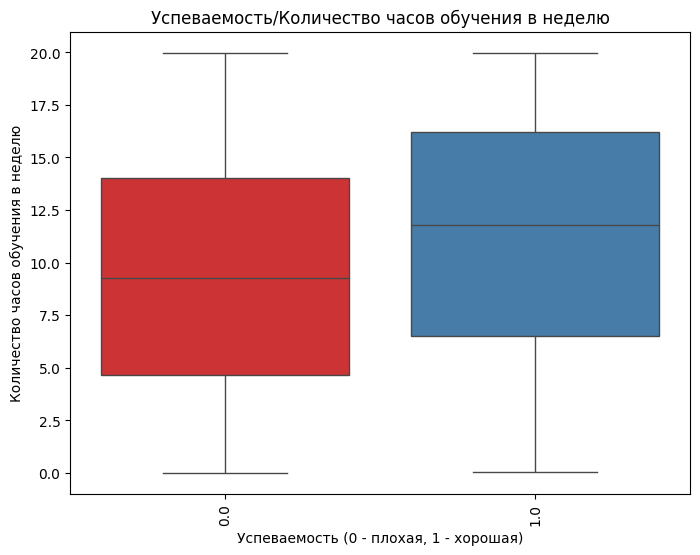

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Binary_student_assessment'], y=df['StudyTimeWeekly'], palette='Set1')
plt.title('Успеваемость/Количество часов обучения в неделю')
plt.xlabel('Успеваемость (0 - плохая, 1 - хорошая)')
plt.ylabel('Количество часов обучения в неделю')
plt.xticks(rotation=90)
plt.show()

Данные в двух выборках не распределены нормально (тест Шапиро-Уилка) и дисперсии в них равны (тест Левена), поэтому для сравнения средних двух виборок был проведён непараметрический тест Манна-Уитни, который показал p-value < 0.05, что помогает отвергнуть нулевую гипотезу H0 и сделать вывод, что различия между двумя выборками значимы и среднее количество часов обучения в неделю студентов с хорошей и плохой успеваемость различается.

Несмотря на то, что дисперсии равны ненормальность распределения не даёт провести t-тест, так как результаты будут некорректными.

Так как разбросы выборок слишком похожи, то сравниваются их медианы. На графики ящик с усами не наблюдается выбросов и медиана количества часов обучения для студентов с хорошей успеваемостью выше, чем у студентов с плохой успеваемостью.

# 4) Проанализируйте корреляции непрерывных признаков или зависимость качественных (критерий хи-квадрат), проведите статистический вывод.

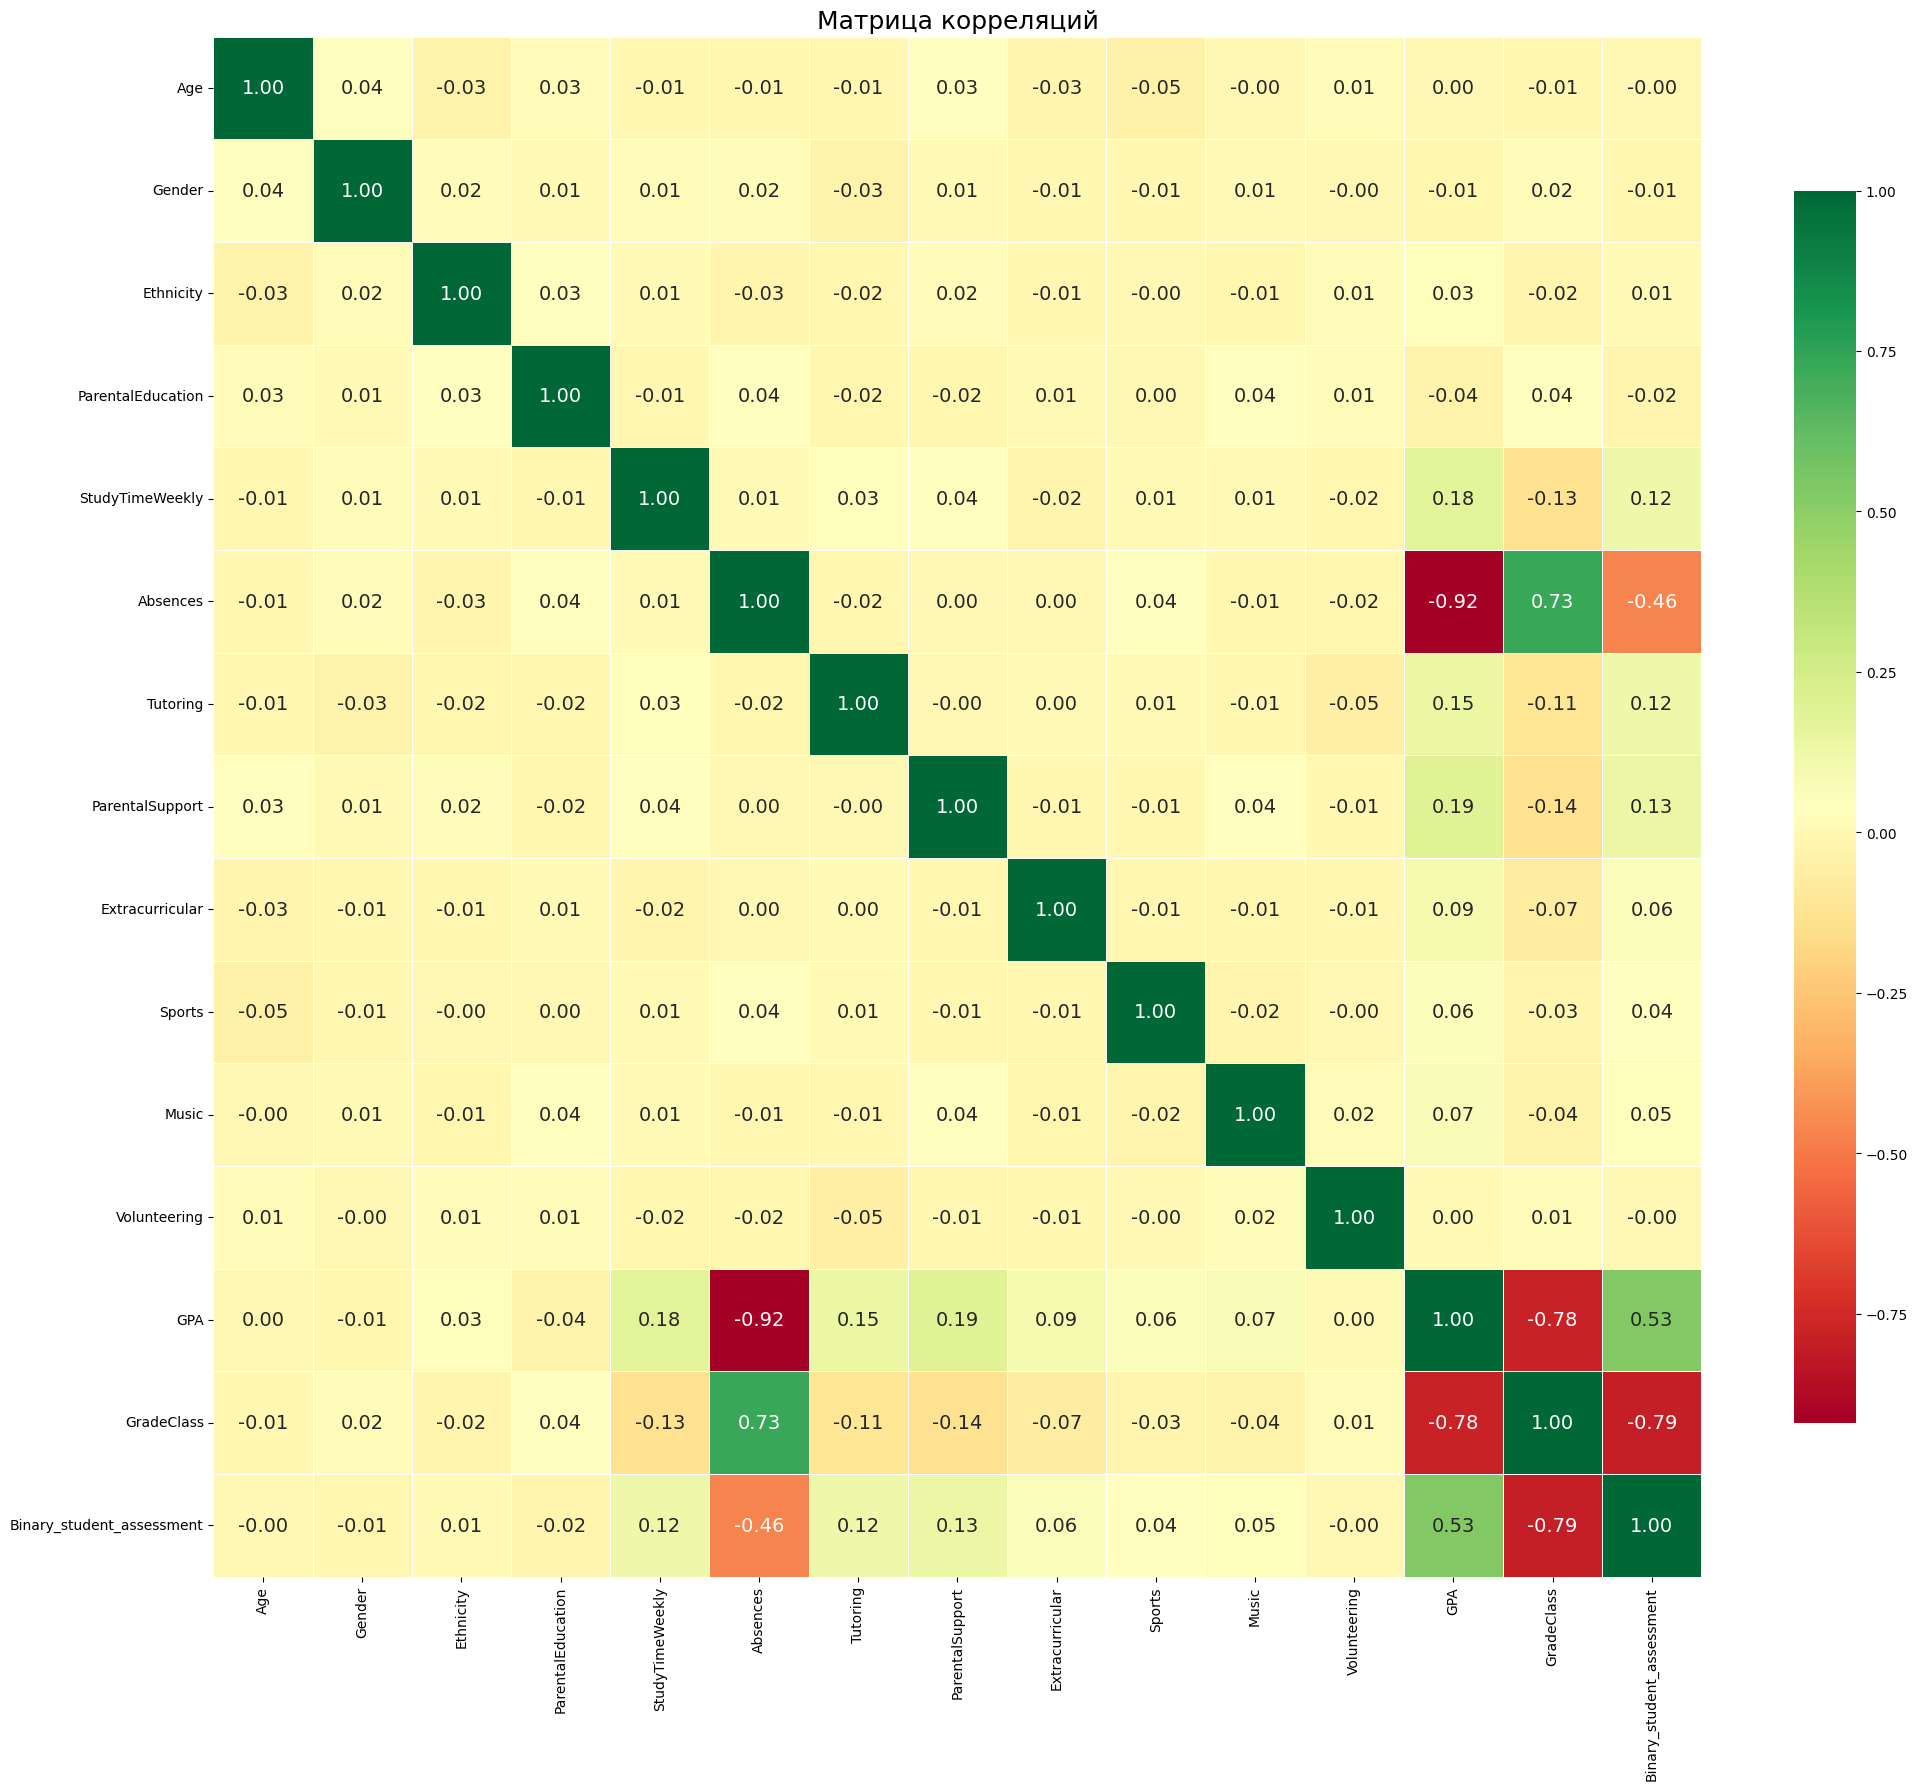

In [ ]:
df_numeric = df.select_dtypes(include=[float, int])

plt.figure(figsize=(24, 20))
sns.heatmap(df_numeric.corr(),
    annot=True,
    fmt=".2f",
    cmap='RdYlGn',
    annot_kws={'size': 14},
    linewidths=0.5,
    cbar_kws={'shrink': 0.8})

plt.title('Матрица корреляций', fontsize=18)
plt.show()

Признаки GPA, GradeClass, Binary_student_assessment сильно коррелируют между собой, потому что все они представляют успеваемость студента в разных форматах.

1) GPA - это вещественное число от 0 до 4, которое представляет средний балл студента

2) GradeClass - это категориальная переменная, которая делит студентов на 5 групп по степени успеваемости

3) Binary_student_assessment - это созданная категориальная бинарная переменная, распределяющая студентов по успеваемости на хорошую и плохую.

Каждый из этих признаков может быть целевым в зависимости от модели обучения. Целевые признаки также сильно коррелируют с признаком Absences и слабо коррелируют с признаками Tutoring, ParentalSupport, StudyTimeWeekly, Extracurricular. Сильных зависимостей между нецелевыми признаками (мультиколлинеарность) не наблюдается.